In [282]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
# Reading the final cleaned dataset
cleaned_df = pd.read_csv('census_epa_theil_cleaned.csv')

In [284]:
cleaned_df.head(3)

,ID,NAME,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,AREALAND,pop_tot,pop_white_only,pop_black,...,UST,PWDIS,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,prim_ind_share,sec_ind_share,health_ins_pct,theil_income_median
0,1001020100,"Census Tract 201, Autauga County, Alabama",Alabama,AL,Autauga,4.0,9825304.0,1791.0,1502.0,199.0,...,0.330720,0.086036,83.863763,11.111111,2.400893,1.563372,0.111669,4.969291,90.954774,0.000003
1,1001020200,"Census Tract 202, Autauga County, Alabama",Alabama,AL,Autauga,4.0,3320818.0,2010.0,785.0,1175.0,...,2.208384,0.097622,39.054726,58.457711,2.736318,0.497512,0.000000,6.746712,93.024585,0.000004
2,1001020300,"Census Tract 203, Autauga County, Alabama",Alabama,AL,Autauga,4.0,5349271.0,3577.0,2433.0,1105.0,...,1.830997,0.001432,68.017892,30.891809,3.634330,0.363433,0.000000,7.450098,96.232780,0.000002


In [285]:
cleaned_df.isnull().sum()

ID                             0
NAME                           0
STATE_NAME                     0
ST_ABBREV                      0
CNTY_NAME                      0
REGION                         0
AREALAND                       0
pop_tot                        0
pop_white_only                 0
pop_black                      0
pop_asian                      0
pop_hispanic_latino_any        0
industry_tot                   0
industry_ag_for                0
industry_const                 0
industry_manu                  0
industry_transp                0
pop_density                    0
poverty_pct                    0
income_median                  0
health_ins_tot                 0
health_ins_yes                 0
health_ins_no                  0
PM25                           0
OZONE                          0
DSLPM                          0
PTRAF                          0
PRE1960PCT                     0
PNPL                           0
PRMP                           0
PTSDF     

In [286]:
# Selecting the urban data with a population density of more than 500

df = cleaned_df[cleaned_df['pop_density'] > 500]

In [287]:
# Selecting the relevant columns that will be used for the model
# PM25 is the target variable
# The other variables are the features

rel_cols = ['PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS', 'pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any', 'pop_density', 'prim_ind_share', 'sec_ind_share', 'poverty_pct', 'theil_income_median', 'health_ins_pct']

In [288]:
model_df = df[rel_cols]

In [289]:
model_df.head(3)

,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct
1,9.722213,60.02012,0.176942,65.510247,0.294511,0.072671,0.082691,0.067863,2.208384,0.097622,39.054726,58.457711,2.736318,0.497512,605.272556,0.000000,6.746712,6.6,4.435235e-06,93.024585
2,9.743874,59.90393,0.204497,46.665740,0.087077,0.075500,0.082142,0.071178,1.830997,0.001432,68.017892,30.891809,3.634330,0.363433,668.689248,0.000000,7.450098,17.2,1.944627e-06,96.232780
3,9.766758,59.95221,0.242509,144.572390,0.081486,0.084302,0.087589,0.079793,2.958719,0.000062,89.689637,7.048922,0.920568,0.736454,595.525072,0.079051,11.646904,8.1,7.687476e-07,95.177866


In [290]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 1 to 80147
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PM25                         48660 non-null  float64
 1   OZONE                        48660 non-null  float64
 2   DSLPM                        48660 non-null  float64
 3   PTRAF                        48660 non-null  float64
 4   PRE1960PCT                   48660 non-null  float64
 5   PNPL                         48660 non-null  float64
 6   PRMP                         48660 non-null  float64
 7   PTSDF                        48660 non-null  float64
 8   UST                          48660 non-null  float64
 9   PWDIS                        48660 non-null  float64
 10  pct_pop_white_only           48660 non-null  float64
 11  pct_pop_black                48660 non-null  float64
 12  pct_pop_asian                48660 non-null  float64
 13  pct_pop_hispanic

In [291]:
# df.groupby('STATE_NAME').sum(numeric_only=True)[['pop_tot', 'AREALAND']]

In [292]:
# df.groupby('STATE_NAME').mean(numeric_only=True)[['pop_density']]

In [293]:
model_df.describe()

,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,4.866000e+04,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000
mean,8.399646,63.008164,0.348491,322.276092,0.340770,0.172319,0.531623,2.968207,5.787213,2.804354e+01,60.501119,18.794408,8.571449,21.892954,3391.516251,0.391003,7.422150,14.486967,0.000001,90.864527
std,1.386478,6.346916,0.205838,540.270208,0.296705,0.318608,0.772425,4.548543,8.520505,1.817666e+03,25.532598,23.901799,11.699568,23.569227,5764.039199,1.111526,3.995210,12.083903,0.000006,7.818534
min,2.865505,43.585200,0.015866,0.010887,0.000000,0.002087,0.006408,0.006591,0.000000,5.526000e-12,0.000000,0.000000,0.000000,0.000000,500.002938,0.000000,0.000000,0.000000,-0.000015,24.155578
25%,7.458514,59.419762,0.219173,85.740125,0.045722,0.043385,0.123807,0.375955,1.058398,1.254224e-04,43.538564,3.148820,1.354531,4.984195,1040.498830,0.000000,4.658856,5.600000,-0.000003,87.665254
50%,8.431502,62.994390,0.301019,160.400848,0.283611,0.086753,0.218342,1.382861,2.953289,3.339829e-03,65.826630,8.728894,4.424478,12.507523,1744.004668,0.000000,6.936784,10.900000,0.000001,93.066784
75%,9.419218,66.283658,0.411496,321.449695,0.604679,0.165646,0.628315,3.615433,6.792924,7.161709e-02,81.440325,23.487337,10.743097,30.415183,3120.538178,0.373529,9.644852,20.100000,0.000005,96.409275
max,12.137195,100.257230,1.996183,12256.652984,1.000000,11.891744,13.682186,73.535511,126.661351,2.589740e+05,100.000000,100.000000,96.443031,100.000000,119744.771358,36.585366,218.292683,95.200000,0.000042,100.000000


<Figure size 1500x600 with 0 Axes>

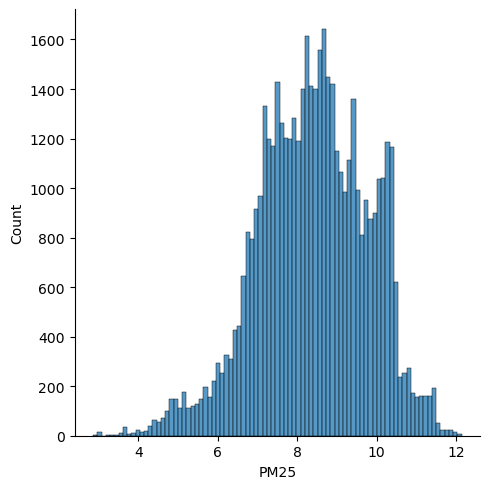

In [294]:
# Distribution of PM25 in the dataset

plt.figure(figsize=(15,6))
sns.displot(model_df['PM25'])

In [295]:
# Converting the target variable to a categorical variable
# PM25 values greater than 9 are considered unhealthy

model_df['PM25_risk'] = model_df['PM25'].apply(lambda x: 1 if x>9 else 0)

/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_12042/75472975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['PM25_risk'] = model_df['PM25'].apply(lambda x: 1 if x>9 else 0)


In [296]:
len(model_df[model_df['PM25'] > 9])

16466

In [297]:
model_df['PM25_risk'].value_counts()

0    32194
1    16466
Name: PM25_risk, dtype: int64

## EDA

In [298]:
# Correlation Matrix
model_df.describe()

,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS,...,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct,PM25_risk
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,4.866000e+04,...,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000
mean,8.399646,63.008164,0.348491,322.276092,0.340770,0.172319,0.531623,2.968207,5.787213,2.804354e+01,...,18.794408,8.571449,21.892954,3391.516251,0.391003,7.422150,14.486967,0.000001,90.864527,0.338389
std,1.386478,6.346916,0.205838,540.270208,0.296705,0.318608,0.772425,4.548543,8.520505,1.817666e+03,...,23.901799,11.699568,23.569227,5764.039199,1.111526,3.995210,12.083903,0.000006,7.818534,0.473166
min,2.865505,43.585200,0.015866,0.010887,0.000000,0.002087,0.006408,0.006591,0.000000,5.526000e-12,...,0.000000,0.000000,0.000000,500.002938,0.000000,0.000000,0.000000,-0.000015,24.155578,0.000000
25%,7.458514,59.419762,0.219173,85.740125,0.045722,0.043385,0.123807,0.375955,1.058398,1.254224e-04,...,3.148820,1.354531,4.984195,1040.498830,0.000000,4.658856,5.600000,-0.000003,87.665254,0.000000
50%,8.431502,62.994390,0.301019,160.400848,0.283611,0.086753,0.218342,1.382861,2.953289,3.339829e-03,...,8.728894,4.424478,12.507523,1744.004668,0.000000,6.936784,10.900000,0.000001,93.066784,0.000000
75%,9.419218,66.283658,0.411496,321.449695,0.604679,0.165646,0.628315,3.615433,6.792924,7.161709e-02,...,23.487337,10.743097,30.415183,3120.538178,0.373529,9.644852,20.100000,0.000005,96.409275,1.000000
max,12.137195,100.257230,1.996183,12256.652984,1.000000,11.891744,13.682186,73.535511,126.661351,2.589740e+05,...,100.000000,96.443031,100.000000,119744.771358,36.585366,218.292683,95.200000,0.000042,100.000000,1.000000


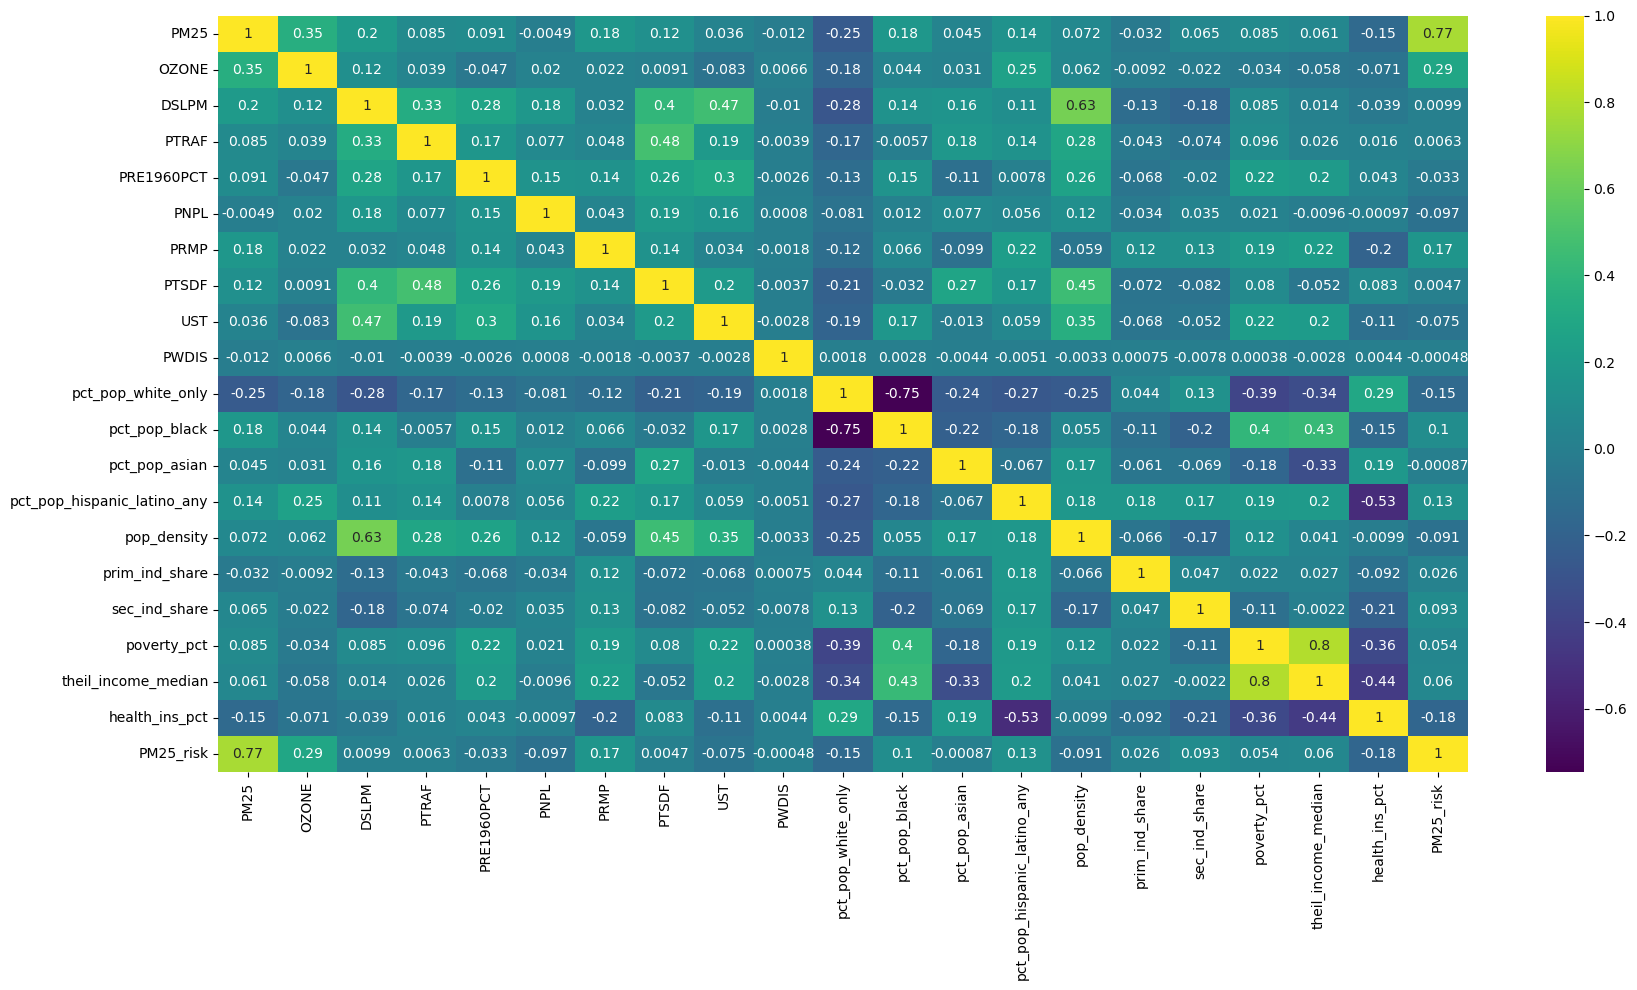

In [299]:
plt.figure(figsize=(18, 10))
sns.heatmap(model_df.corr(), annot=True, cmap='viridis')
plt.tight_layout()

<Axes: xlabel='pct_pop_white_only', ylabel='pct_pop_black'>

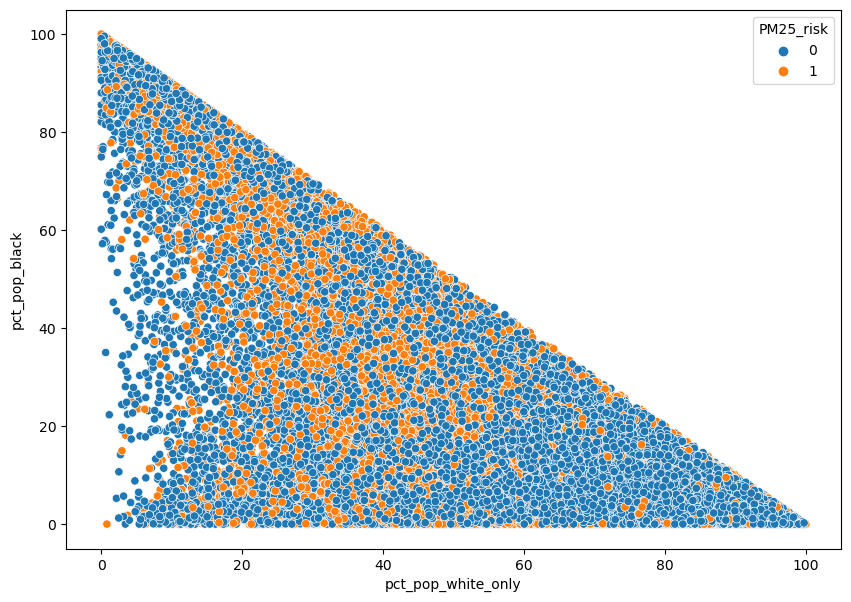

In [300]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pct_pop_white_only', y='pct_pop_black', hue='PM25_risk', data=model_df)

<Axes: xlabel='OZONE', ylabel='Count'>

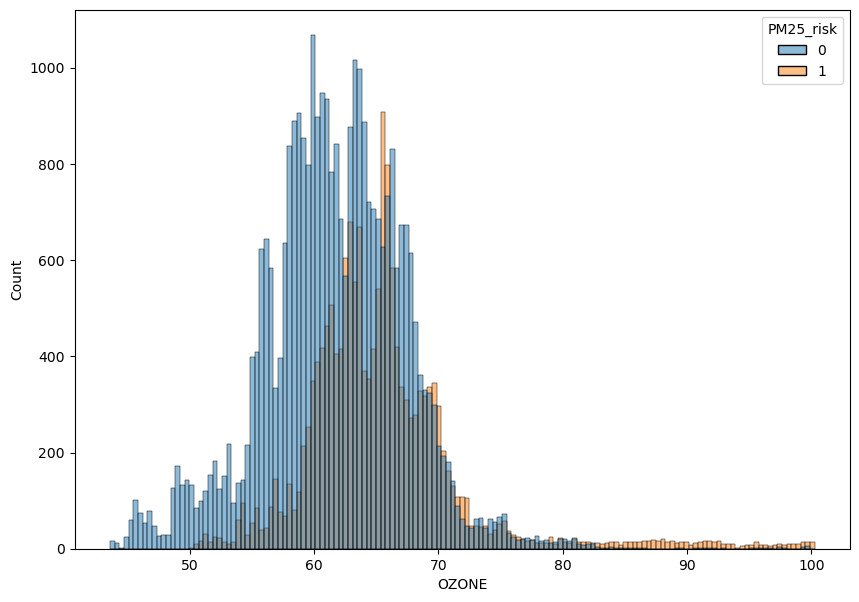

In [301]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='OZONE', hue='PM25_risk')

<Axes: xlabel='pct_pop_white_only', ylabel='Count'>

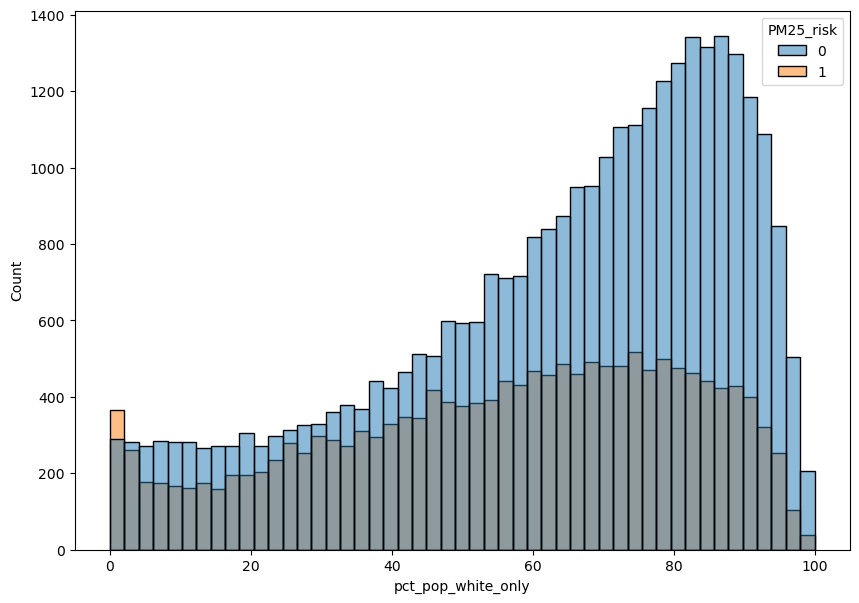

In [302]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='pct_pop_white_only', hue='PM25_risk')

<Axes: xlabel='pct_pop_black', ylabel='Count'>

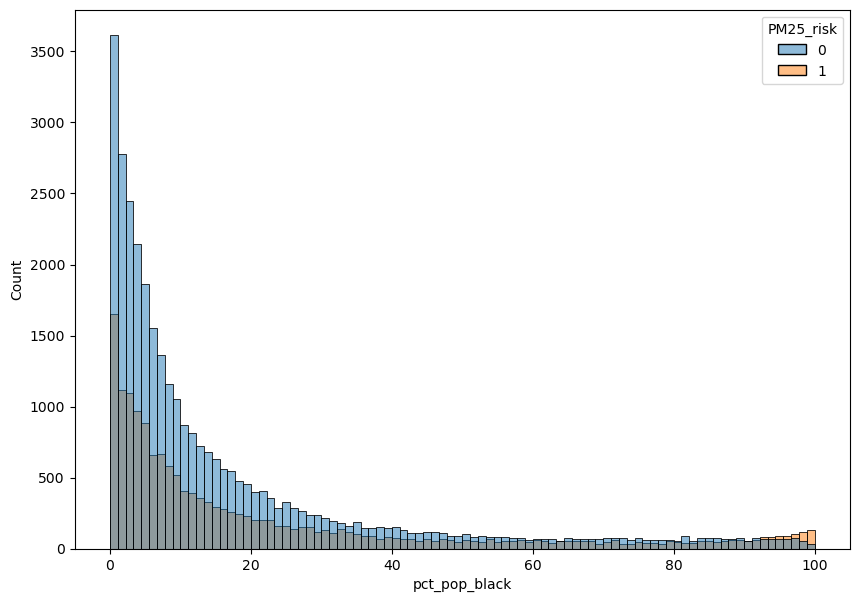

In [303]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='pct_pop_black', hue='PM25_risk')

<Axes: xlabel='health_ins_pct', ylabel='Count'>

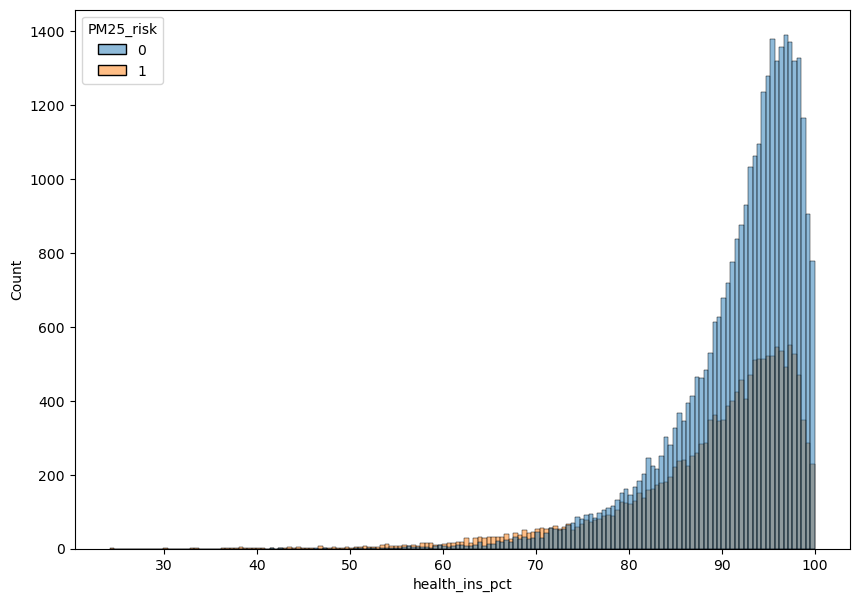

In [304]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='health_ins_pct', hue='PM25_risk')

In [305]:
# OZONE and PM25 are highly correlated
# white and non-white population have mild correlation with PM25

## Model (Decision Tree)

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
# Splitting the dataset into train and test sets

X = model_df.drop(['PM25', 'PM25_risk'], axis=1)
y = model_df['PM25_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [308]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

0    32194
1    16466
Name: PM25_risk, dtype: int64
0    24141
1    12354
Name: PM25_risk, dtype: int64
0    8053
1    4112
Name: PM25_risk, dtype: int64


In [327]:
print(16466/len(y))
print(12354/len(y_train))
print(4112/len(y_test))

0.3383888203863543
0.3385121249486231
0.33801890669954787


In [310]:
# Scaling the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [311]:
X_train.columns

Index(['OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST',
       'PWDIS', 'pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian',
       'pct_pop_hispanic_latino_any', 'pop_density', 'prim_ind_share',
       'sec_ind_share', 'poverty_pct', 'theil_income_median',
       'health_ins_pct'],
      dtype='object')

In [312]:
# everything will be min_max scaled other than theil_income_median 
# theil_income_median will be standard scaled

In [313]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [314]:
std_scaler.fit(X_train[['theil_income_median']])
min_max_scaler.fit(X_train.drop('theil_income_median', axis=1))

MinMaxScaler()

In [315]:
X_train = np.hstack(( min_max_scaler.transform(X_train.drop('theil_income_median', axis=1)), std_scaler.transform(X_train[['theil_income_median']]) ))
X_test = np.hstack(( min_max_scaler.transform(X_test.drop('theil_income_median', axis=1)), std_scaler.transform(X_test[['theil_income_median']]) ))

In [330]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [381]:
dec_tree = DecisionTreeClassifier()

In [382]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [383]:
y_pred = dec_tree.predict(X_test)

In [384]:
# Evaluation Metrics

from sklearn.metrics import classification_report, confusion_matrix

In [385]:
print('Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
print('\n Classification Report: \n\n', classification_report(y_test, y_pred))

Confusion Matrix: 

 [[7071  982]
 [ 982 3130]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.88      0.88      8053
           1       0.76      0.76      0.76      4112

    accuracy                           0.84     12165
   macro avg       0.82      0.82      0.82     12165
weighted avg       0.84      0.84      0.84     12165



In [386]:
# Visualizing the Decision Tree

from sklearn.tree import plot_tree

In [387]:
print('\n Tree Depth = ', dec_tree.get_depth(), '\n No. of leaves = ', dec_tree.get_n_leaves())


 Tree Depth =  31 
 No. of leaves =  3087


In [388]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

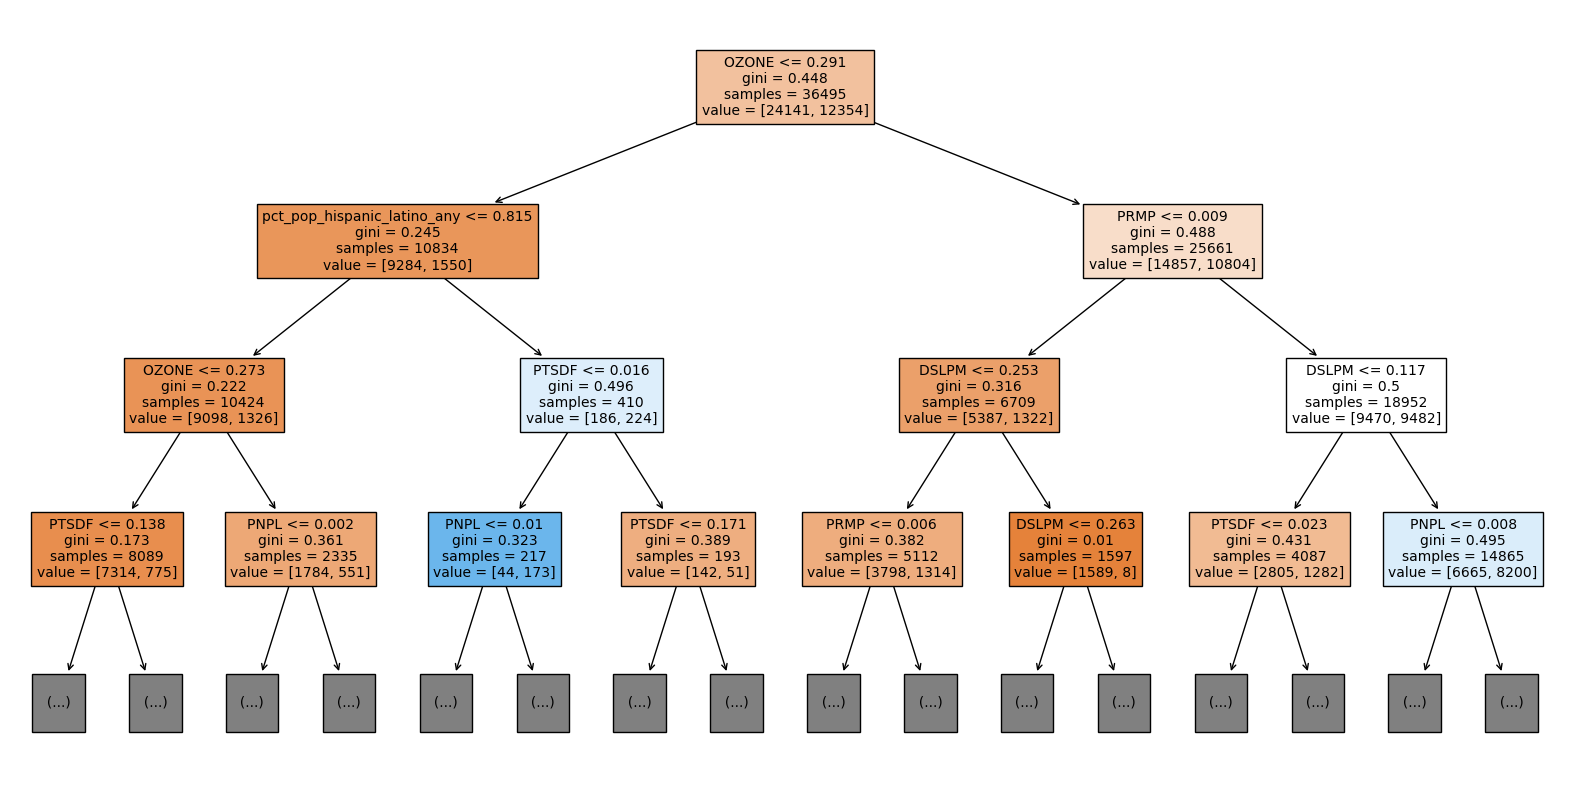

In [389]:
plt.figure(figsize=(20,10))
plot_tree(dec_tree, fontsize=10, max_depth=3, filled=True, feature_names=[col for col in X.columns])
plt.show()

In [390]:
# From the tree it, we see that OZONE is the most important feature for spliting the data as expected from the correlation table.
# For the next split the model uses pct_pop_hispanic_latino_any and PRMP and then other features.

In [391]:
# The Baseline model would be to predict no risk for all the tracks
# The baseline accuracy would be 67% since 67% of the tracks have no risk
# The model accuracy is 84% which is better than the baseline model

In [392]:
# We can also look at other metrics like precision, recall and f1-score

In [ ]:
# Things to do:
# 1. Grid Search for hyperparameter tuning
# 2. Kfold cross validation
# 3. Compare with other models